In [ ]:
%pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-3.0.1-py3-none-any.whl.metadata (10.0 kB)
Using cached pybind11-3.0.1-py3-none-any.whl (293 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp312-cp312-linux_x86_64.whl size=4498211 sha256=eed0ba0ecbb92c6dd1302cdeca5be0e8e70af75af441b4c564fafcdf8ff89c24
  Stored in directory: /root/.cache/pip/wheels/20/27/95/a7baf1b435f1cbde017cabdf1e9688526d2b0e929255a359c6
Successfully built fasttext


In [ ]:
import pandas as pd
import fasttext
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
# Baca dataset
df = pd.read_csv("/content/dataset_laptop_preprocessed_v2.csv")

In [ ]:
# Baca dataset
df2 = pd.read_csv("/content/dataset_laptop_preprocessed_v2.csv")

In [ ]:
# Baca dataset
df3 = pd.read_csv("/content/dataset_laptop_preprocessed_v2.csv")

In [ ]:
# Format FastText: __label__<label> <text>
df['fasttext_format'] = '__label__' + df['label_rekomendasi'] + ' ' + df['preprocessed']

In [ ]:
# Format FastText: __label__<label> <text>
df2['fasttext_format'] = '__label__' + df2['label_rekomendasi'] + ' ' + df2['preprocessed']

In [ ]:
# Format FastText: __label__<label> <text>
df3['fasttext_format'] = '__label__' + df3['label_rekomendasi'] + ' ' + df3['preprocessed']

In [ ]:
# Simpan ke file txt
df['fasttext_format'].to_csv("fasttext_train.txt", index=False, header=False)

In [ ]:
# Simpan ke file txt
df2['fasttext_format'].to_csv("fasttext_train_v2.txt", index=False, header=False)

In [ ]:
# Simpan ke file txt
df3['fasttext_format'].to_csv("fasttext_train_v3.txt", index=False, header=False)

In [ ]:
# Latih model dalam mode supervised
model = fasttext.train_supervised(input="fasttext_train.txt", epoch=10, lr=2.0, wordNgrams=2, dim=100)

In [ ]:
# Latih model dalam mode supervised
model2 = fasttext.train_supervised(input="fasttext_train_v2.txt", epoch=20, lr=3.0, wordNgrams=4, dim=100)

In [ ]:
# Latih model dalam mode supervised
model3 = fasttext.train_supervised(input="fasttext_train_v3.txt", epoch=50, lr=4.0, wordNgrams=5, dim=100)

In [ ]:
# Simpan model
model.save_model("fasttext_model.bin")

In [ ]:
# Simpan model
model2.save_model("fasttext_model_v2.bin")

In [ ]:
# Simpan model
model3.save_model("fasttext_model_v3.bin")

In [ ]:
# testing model FastText
vector = model.get_sentence_vector("butuh laptop ringan untuk desain dan kuliah")
print(vector)  # Ini adalah array numpy 1x100 (default dim=50)

[ 0.0153919  -0.00959598 -0.00525218  0.03899195  0.05035272  0.08601517
  0.01832929 -0.01404745  0.02683563  0.00929768  0.00670899 -0.00886745
 -0.03124583 -0.04920598  0.05798726 -0.0236762  -0.01490365 -0.02664039
 -0.01259043  0.04560139  0.01696121 -0.02083563  0.00533637  0.00227482
  0.05262676  0.01903576  0.03358403 -0.01989439 -0.02994841  0.04375246
  0.04385794  0.04184898 -0.03830287  0.00693806 -0.07244006  0.00688321
 -0.05814383  0.03656053  0.07607607  0.06861336 -0.01450805 -0.0105095
  0.04583974  0.08411683 -0.01290665  0.02987177 -0.00763454  0.02151017
  0.02154676  0.01959953  0.00956027 -0.0123927   0.00716783 -0.00443949
  0.04168931  0.04595539  0.01585116 -0.00182677 -0.04875735  0.01599728
 -0.00407115 -0.00514457  0.03811186 -0.00633045 -0.00093625 -0.00227964
 -0.01390157 -0.02754528  0.01574218 -0.0220071   0.00240185 -0.06729489
 -0.00393421  0.07159977  0.02688262  0.01509709 -0.05439067 -0.01903297
  0.09512712 -0.03315211 -0.04592475  0.00410628 -0.

In [ ]:
# Testing model FastText
vector2 = model2.get_sentence_vector("butuh laptop coding multitasking")
print(vector2)  # Ini adalah array numpy 1x100 (default dim=100)

[-0.03198249 -0.00057051 -0.02026326 -0.00190949 -0.07649861 -0.08798054
  0.00892764  0.01546322 -0.04161157 -0.02902658 -0.0101837   0.0109963
  0.01609668  0.08373246 -0.00370191  0.04075006  0.01295297 -0.00290779
 -0.00393445  0.02633149 -0.00155147  0.00387668 -0.00490813 -0.04502757
 -0.04100293 -0.01454625 -0.02001865  0.02277152  0.10614877 -0.00064237
  0.0039703  -0.09183385  0.05732701 -0.03202453  0.0746505   0.06514779
  0.08366389 -0.05989324 -0.03709199 -0.08261751  0.00050527 -0.0422991
  0.02327986 -0.06405015 -0.02289904 -0.06525382 -0.0116669   0.01499264
 -0.07520896 -0.02417737  0.02850178  0.04693324  0.01560674  0.02648021
 -0.02983356 -0.01353068 -0.03674331  0.00394994  0.01724835 -0.03796303
  0.02616454 -0.03436935 -0.05253889 -0.02726234 -0.03631032  0.00046755
  0.05291346 -0.01373056 -0.06997726  0.02180316  0.03216933  0.05938911
  0.01306362 -0.01172138  0.07415198 -0.00811766  0.04760179 -0.01511652
 -0.11012325  0.0786361   0.0169683  -0.00245705  0.0

In [ ]:
# Testing model FastText
vector3 = model3.get_sentence_vector("butuh laptop coding multitasking")
print(vector3)  # Ini adalah array numpy 1x100 (default dim=200)

[-5.44411279e-02  8.03336129e-02  1.55790532e-02 -2.26707309e-02
 -3.12370919e-02  8.64967257e-02 -7.33984038e-02  3.36923562e-02
  4.21542339e-02  5.50168194e-02 -2.98479456e-03 -2.12322008e-02
 -7.75495963e-03  3.02019529e-03  1.42584294e-02 -7.39115998e-02
  6.06353059e-02 -4.35287990e-02  1.10892370e-01 -9.61401537e-02
 -9.02500190e-03  1.41727217e-02  7.21585974e-02  2.68065073e-02
 -1.22290954e-01 -7.11394325e-02 -2.49417499e-02  6.32203147e-02
 -2.97773797e-02 -5.35189919e-02  2.08631158e-02 -1.11210765e-02
 -3.47772725e-02 -1.77912675e-02 -6.76981807e-02 -6.81210533e-02
 -1.16789185e-01 -7.88904075e-03 -9.00739729e-02  1.07946442e-02
  3.50650512e-02  6.13774508e-02 -2.33945306e-02 -3.14283557e-02
 -6.20410894e-04  4.40707579e-02 -2.91805118e-02  9.84853832e-04
  5.11930957e-02 -1.18954189e-03 -1.08632520e-02  4.20282595e-02
  5.10744043e-02 -1.20967710e-02 -4.95737493e-02  4.18264978e-03
 -1.81106534e-02 -3.36266169e-03 -1.48764923e-02 -5.65128289e-02
  8.59876527e-05 -4.56755

In [ ]:
# Load model yang sudah di-train
model = fasttext.load_model('/content/fasttext_model.bin')

In [ ]:
# Load model yang sudah di-train
model2 = fasttext.load_model('/content/fasttext_model_v2.bin')

In [ ]:
# Load model yang sudah di-train
model3 = fasttext.load_model('/content/fasttext_model_v3.bin')

In [ ]:
# Uji representasi vektor dari kata
vector = model.get_word_vector("laptop")
print(vector)

[-0.09635331  0.23260616 -0.09350782  0.04991019  0.00585029 -0.00157236
 -0.00423112 -0.01109816 -0.03357461  0.02606129 -0.21396303  0.13772132
 -0.0846917   0.19550858  0.07973548  0.01794693  0.07807679  0.00382109
 -0.14705248  0.19638841  0.03964707  0.3453762   0.11230492 -0.30962148
  0.03235096  0.03023214  0.20117763 -0.14662765  0.22751227  0.26483223
  0.15861915 -0.22305153 -0.052675   -0.5303615  -0.04608856  0.2004786
  0.09299639 -0.24685137  0.06043546 -0.26344666 -0.02948199 -0.02768465
  0.29428574  0.04963731  0.11475831 -0.23120232  0.07734785  0.0772953
 -0.31926203 -0.00632376  0.00465479  0.45950696  0.06810723  0.01669861
 -0.04056999 -0.04698067 -0.15796232 -0.01114705  0.02678949 -0.18059827
 -0.12567098 -0.20406689  0.16710508 -0.14359547  0.07025766  0.04050136
  0.16947567 -0.23899195 -0.22817805  0.07299483  0.06758706  0.12902597
  0.10931434  0.01555644  0.44516847  0.10728389  0.12006217 -0.02626978
 -0.16606832  0.29963413 -0.11009759  0.05451438  0.1

In [ ]:
# Uji representasi vektor dari kata
vector2 = model2.get_word_vector("laptop")
print(vector2)

[-0.12909254  0.27675298 -0.17557703  0.01976529  0.24516626  0.296641
 -0.08360507 -0.13874221  0.11685432  0.14386405 -0.22196122  0.15431485
 -0.11077137  0.21515691  0.21948352 -0.08120359  0.07331012 -0.02157261
 -0.30110848  0.41032368  0.09730065  0.35618058  0.25438124 -0.43615386
  0.12027304 -0.1258452   0.31372344 -0.19640657  0.13447152  0.597566
  0.19018911 -0.3625178  -0.12264534 -0.8818805  -0.30069676  0.36732087
 -0.00819061 -0.4015134   0.33574533 -0.3082514  -0.19991471  0.0308758
  0.5335379   0.2558382   0.20644145 -0.2864238   0.20590118  0.24121009
 -0.36610258  0.09238598  0.08271513  0.64461416  0.20582783  0.11140498
 -0.04302316 -0.0300096  -0.181759    0.05477815  0.10934736 -0.39303073
 -0.05507247 -0.3006624   0.34871727 -0.08561661 -0.02918235  0.04198751
 -0.11581941 -0.47666323 -0.31682706  0.04249518  0.13714029  0.09293289
  0.27606392  0.13612251  0.6669096   0.06240595  0.11876395 -0.03562227
  0.08782531  0.3459861  -0.19517861  0.00956719  0.2378

In [ ]:
# Uji representasi vektor dari kata
vector3 = model3.get_word_vector("laptop")
print(vector3)

[ 1.34637490e-01  4.24993932e-01  2.22207278e-01 -4.15374249e-01
  1.21468604e+00  1.21132648e+00 -1.05518483e-01 -4.44833159e-01
  5.05272269e-01  3.56887430e-01 -1.08566391e-03 -4.35414076e-01
 -2.54268050e-01 -7.65157044e-01  1.03358492e-01 -5.96518993e-01
 -2.33616516e-01 -2.22627357e-01 -3.79823923e-01  4.84966248e-01
  8.70498642e-02  3.22291046e-01  5.73518336e-01 -2.21697167e-02
  6.11702502e-01  1.20938830e-01  9.91106927e-01 -6.11099124e-01
 -1.10081589e+00  6.35063827e-01  1.20470271e-01  6.36846602e-01
 -9.05818760e-01 -5.17244816e-01 -1.67087984e+00 -4.36051458e-01
 -1.05482101e+00  4.00955975e-01  5.24503827e-01  5.42056322e-01
 -4.01624471e-01  4.76759315e-01 -1.16784468e-01  9.39409792e-01
  4.62101877e-01  4.88069087e-01  1.04442608e+00  4.58954871e-02
  4.57549691e-01  3.01051646e-01 -6.76969111e-01  4.37112361e-01
  2.27522209e-01 -1.43728346e-01  3.15831035e-01  4.32678163e-01
  5.49076319e-01 -1.62434787e-01  2.54845589e-01  1.16539977e-01
 -7.91773021e-01  7.82241

In [ ]:
# Mengecek kata-kata yang mirip
print(model.get_nearest_neighbors("desain"))

[(0.9841792583465576, 'premiere'), (0.9838507771492004, 'adobe'), (0.9831650853157043, 'photoshop'), (0.9780338406562805, 'penyimpanan'), (0.9743878245353699, 'kualitas'), (0.9724843502044678, 'jernih'), (0.9719142317771912, 'speaker'), (0.9705289602279663, 'dolby'), (0.9705071449279785, 'video'), (0.9695093035697937, 'atmos')]


In [ ]:
# Mengecek kata-kata yang mirip
print(model2.get_nearest_neighbors("desain"))

[(0.9807331562042236, 'illustrator'), (0.9803774356842041, 'pro'), (0.9758435487747192, 'kualitas'), (0.9705438017845154, 'penyimpanan'), (0.9688878655433655, 'arsitektur'), (0.9682298302650452, 'konten'), (0.9660580158233643, 'multimedia'), (0.9654600620269775, 'kapasitas'), (0.9649488925933838, 'proses'), (0.9646071791648865, 'vlog')]


In [ ]:
# Mengecek kata-kata yang mirip
print(model3.get_nearest_neighbors("desain"))

[(0.9749296307563782, 'render'), (0.9618281126022339, 'adobe'), (0.961456835269928, 'premiere'), (0.960142195224762, 'photoshop'), (0.9585725665092468, 'konten'), (0.9585037231445312, 'arsitektur'), (0.9584534764289856, 'vlog'), (0.9582024812698364, 'youtube'), (0.9561858773231506, 'layar'), (0.952197790145874, 'penyimpanan')]


In [ ]:
# Ubah text menjadi vektor menggunakan FastText
def text_to_vector(text):
    return model.get_sentence_vector(text)

X = np.array([text_to_vector(text) for text in df['preprocessed']])
y = df['label_rekomendasi']

In [ ]:
# Ubah text menjadi vektor menggunakan FastText
def text_to_vector(text):
    return model2.get_sentence_vector(text)

I = np.array([text_to_vector(text) for text in df2['preprocessed']])
J = df2['label_rekomendasi']

In [ ]:
# Ubah text menjadi vektor menggunakan FastText
def text_to_vector(text):
    return model3.get_sentence_vector(text)

K = np.array([text_to_vector(text) for text in df3['preprocessed']])
L = df3['label_rekomendasi']

In [ ]:
# Split data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
# Split data train dan test
I_train, I_test, J_train, J_test = train_test_split(I, J, test_size=0.4, random_state=42)

In [ ]:
# Split data train dan test
K_train, K_test, L_train, L_test = train_test_split(K, L, test_size=0.4, random_state=42)

In [ ]:
# Training Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Training Random Forest
rf_classifier2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier2.fit(I_train, J_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Training Random Forest
rf_classifier3 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier3.fit(K_train, L_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Prediksi dan evaluasi
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")
print(classification_report(y_test, y_pred))

Akurasi: 0.967741935483871
              precision    recall  f1-score   support

      gaming       0.87      1.00      0.93        13
  multimedia       1.00      0.89      0.94         9
      office       1.00      1.00      1.00        13
 programming       1.00      0.93      0.96        14
 workstation       1.00      1.00      1.00        13

    accuracy                           0.97        62
   macro avg       0.97      0.96      0.97        62
weighted avg       0.97      0.97      0.97        62



In [ ]:
# Prediksi dan evaluasi
J_pred = rf_classifier2.predict(I_test)
accuracy2 = accuracy_score(J_test, J_pred)
print(f"Akurasi: {accuracy2}")
print(classification_report(J_test, J_pred))

Akurasi: 0.9516129032258065
              precision    recall  f1-score   support

      gaming       0.87      1.00      0.93        13
  multimedia       1.00      0.89      0.94         9
      office       0.93      1.00      0.96        13
 programming       1.00      0.86      0.92        14
 workstation       1.00      1.00      1.00        13

    accuracy                           0.95        62
   macro avg       0.96      0.95      0.95        62
weighted avg       0.96      0.95      0.95        62



In [ ]:
# Prediksi dan evaluasi
L_pred = rf_classifier3.predict(K_test)
accuracy3 = accuracy_score(L_test, L_pred)
print(f"Akurasi: {accuracy3}")
print(classification_report(L_test, L_pred))

Akurasi: 0.967741935483871
              precision    recall  f1-score   support

      gaming       0.87      1.00      0.93        13
  multimedia       1.00      0.89      0.94         9
      office       1.00      1.00      1.00        13
 programming       1.00      0.93      0.96        14
 workstation       1.00      1.00      1.00        13

    accuracy                           0.97        62
   macro avg       0.97      0.96      0.97        62
weighted avg       0.97      0.97      0.97        62



In [ ]:
# Menggunakan 5-Fold Cross Validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')

print("Hasil Cross_validation (5-Fold)")
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score:.4f}")

print(f"\nRata-rata Akurasi: {np.mean(cv_scores):.4f}")
print(f"Standar Deviasi: {np.std(cv_scores):.4f}")

print(f"Cross Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")

Hasil Cross_validation (5-Fold)
Fold 1: 0.9677
Fold 2: 0.9677
Fold 3: 1.0000
Fold 4: 0.9677
Fold 5: 1.0000

Rata-rata Akurasi: 0.9806
Standar Deviasi: 0.0158
Cross Validation Scores: [0.96774194 0.96774194 1.         0.96774194 1.        ]
Mean CV Score: 0.9806451612903226


In [ ]:
# Menggunakan 5-Fold Cross Validation
cv_scores2 = cross_val_score(rf_classifier2, I, J, cv=5, scoring='accuracy')

print("Hasil Cross_validation (5-Fold)")
for i, score in enumerate(cv_scores2, start=1):
    print(f"Fold {i}: {score:.4f}")

print(f"\nRata-rata Akurasi: {np.mean(cv_scores2):.4f}")
print(f"Standar Deviasi: {np.std(cv_scores2):.4f}")

print(f"Cross Validation Scores: {cv_scores2}")
print(f"Mean CV Score: {np.mean(cv_scores2)}")

Hasil Cross_validation (5-Fold)
Fold 1: 0.9677
Fold 2: 0.9677
Fold 3: 1.0000
Fold 4: 0.9677
Fold 5: 1.0000

Rata-rata Akurasi: 0.9806
Standar Deviasi: 0.0158
Cross Validation Scores: [0.96774194 0.96774194 1.         0.96774194 1.        ]
Mean CV Score: 0.9806451612903226


In [ ]:
# Menggunakan 5-Fold Cross Validation
cv_scores3 = cross_val_score(rf_classifier3, K, L, cv=5, scoring='accuracy')

print("Hasil Cross_validation (5-Fold)")
for i, score in enumerate(cv_scores3, start=1):
    print(f"Fold {i}: {score:.4f}")

print(f"\nRata-rata Akurasi: {np.mean(cv_scores3):.4f}")
print(f"Standar Deviasi: {np.std(cv_scores3):.4f}")

print(f"Cross Validation Scores: {cv_scores3}")
print(f"Mean CV Score: {np.mean(cv_scores3)}")

Hasil Cross_validation (5-Fold)
Fold 1: 0.9677
Fold 2: 0.9677
Fold 3: 1.0000
Fold 4: 0.9677
Fold 5: 1.0000

Rata-rata Akurasi: 0.9806
Standar Deviasi: 0.0158
Cross Validation Scores: [0.96774194 0.96774194 1.         0.96774194 1.        ]
Mean CV Score: 0.9806451612903226


In [ ]:
# ===================== VISUALISASI =========================

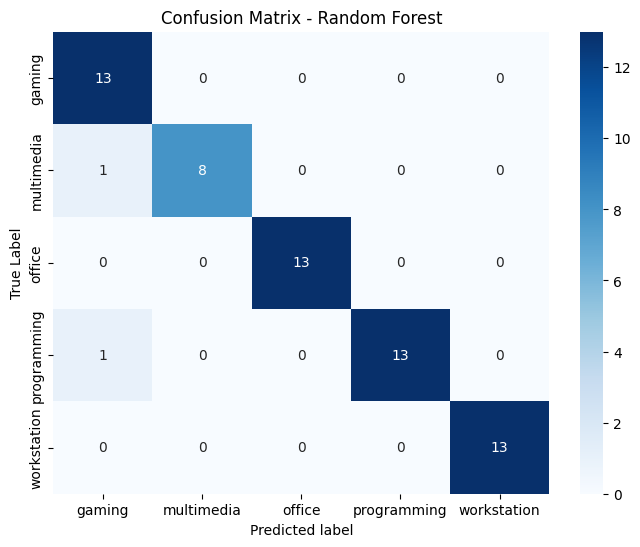

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_classifier.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

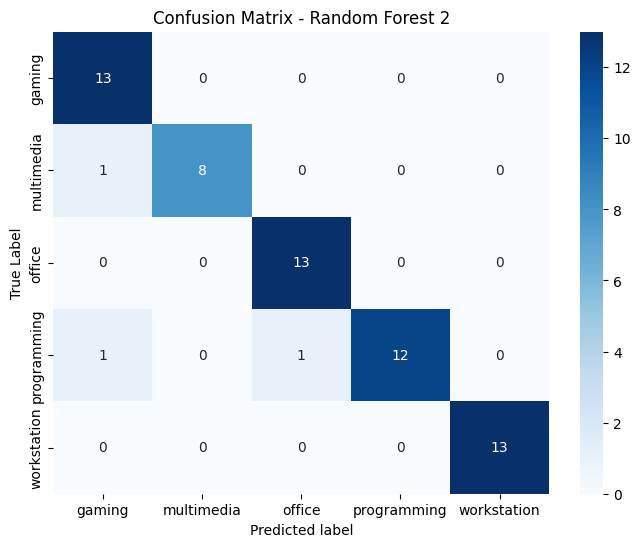

In [ ]:
# Confusion Matrix
cm2 = confusion_matrix(J_test, J_pred, labels=rf_classifier2.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier2.classes_, yticklabels=rf_classifier2.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest 2')
plt.show()

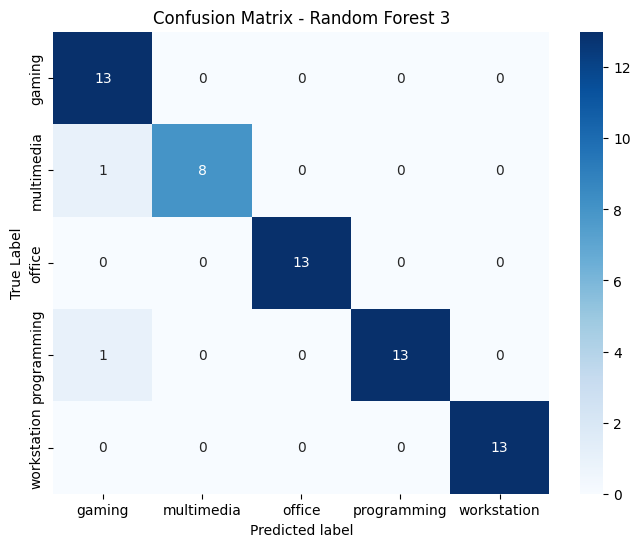

In [ ]:
# Confusion Matrix
cm3 = confusion_matrix(L_test, L_pred, labels=rf_classifier3.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier3.classes_, yticklabels=rf_classifier3.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest 3')
plt.show()

In [ ]:
accuracy_scores = [accuracy, accuracy2, accuracy3]

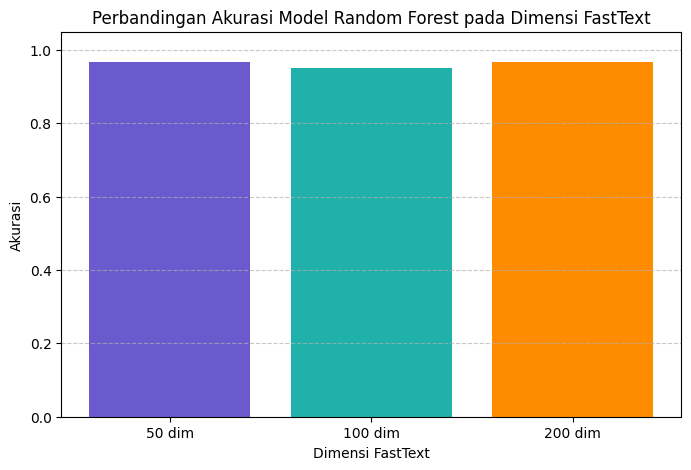

In [ ]:
# ==============================
# 2️⃣ Visualisasi Perbandingan Akurasi Saja
# ==============================
dimensi = ['50 dim', '100 dim', '200 dim']
plt.figure(figsize=(8,5))
plt.bar(dimensi, accuracy_scores, color=['#6A5ACD','#20B2AA','#FF8C00'])
plt.ylim(0, 1.05)
plt.title('Perbandingan Akurasi Model Random Forest pada Dimensi FastText')
plt.xlabel('Dimensi FastText')
plt.ylabel('Akurasi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Misal hasil cross-validation dari masing-masing model
# (gantilah dengan hasil CV kamu sendiri)
cv_scores_model1 = [0.9355,	0.9677,	1.00,	0.9677,	1.00]
cv_scores_model2 = [0.9355,	0.9677,	1.00,	0.9677,	1.00]
cv_scores_model3 = [0.9677,	0.9677,	1.00,	0.9677,	1.00]

# Hitung rata-rata dan standar deviasi tiap model
mean_scores = [
    np.mean(cv_scores_model1),
    np.mean(cv_scores_model2),
    np.mean(cv_scores_model3)
]
std_scores = [
    np.std(cv_scores_model1),
    np.std(cv_scores_model2),
    np.std(cv_scores_model3)
]

# Label dimensi FastText
dimensi = ['Model A', 'Model B', 'Model C']

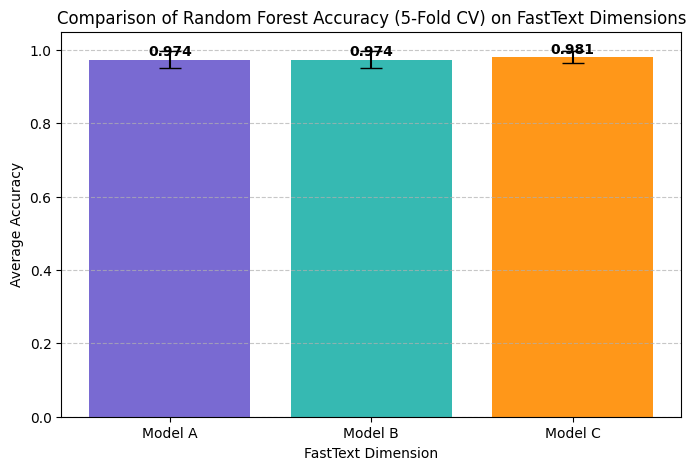

In [3]:
# ==============================
# Visualisasi Perbandingan Akurasi + Standar Deviasi
# ==============================
plt.figure(figsize=(8,5))
bars = plt.bar(dimensi, mean_scores,
               yerr=std_scores,  # error bar dari standar deviasi
               capsize=8,
               color=['#6A5ACD','#20B2AA','#FF8C00'],
               alpha=0.9)

plt.ylim(0, 1.05)
plt.title('Comparison of Random Forest Accuracy (5-Fold CV) on FastText Dimensions')
plt.xlabel('FastText Dimension')
plt.ylabel('Average Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan nilai akurasi di atas batang
for bar, mean in zip(bars, mean_scores):
    plt.text(bar.get_x() + bar.get_width()/2, mean + 0.01,
             f"{mean:.3f}", ha='center', fontsize=10, fontweight='bold')

plt.show()

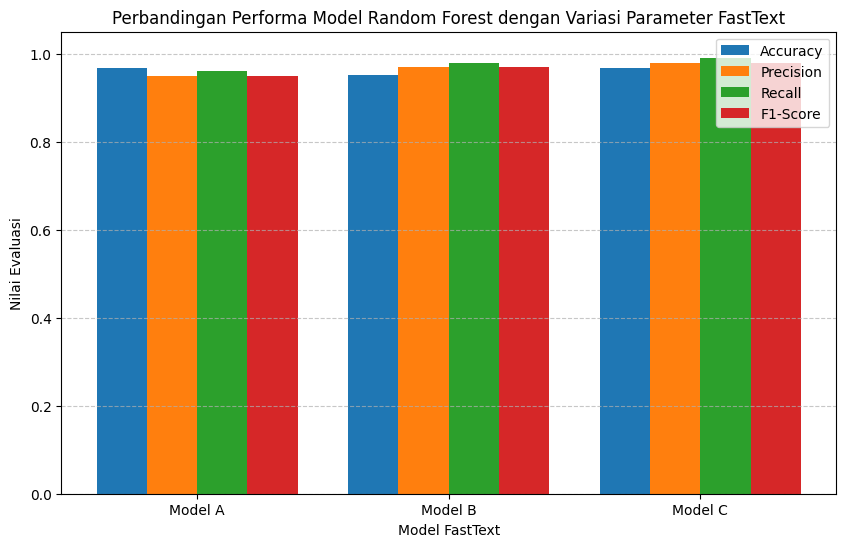

In [ ]:
# ==============================
# 3️⃣ (Opsional) Visualisasi Semua Metrik Sekaligus
# ==============================
precision_scores = [0.95, 0.97, 0.98]
recall_scores = [0.96, 0.98, 0.99]
f1_scores = [0.95, 0.97, 0.98]
x = np.arange(len(dimensi))
width = 0.2

plt.figure(figsize=(10,6))
plt.bar(x - 1.5*width, accuracy_scores, width, label='Accuracy')
plt.bar(x - 0.5*width, precision_scores, width, label='Precision')
plt.bar(x + 0.5*width, recall_scores, width, label='Recall')
plt.bar(x + 1.5*width, f1_scores, width, label='F1-Score')

plt.xticks(x, dimensi)
plt.ylim(0, 1.05)
plt.title('Perbandingan Performa Model Random Forest dengan Variasi Parameter FastText')
plt.xlabel('Model FastText')
plt.ylabel('Nilai Evaluasi')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

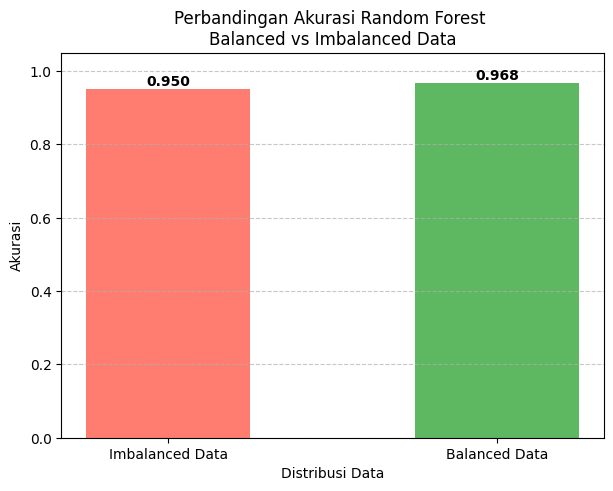

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Misal hasil akurasi model pada data imbalanced dan balanced
# (gantilah dengan nilai hasil evaluasimu)
accuracy_imbalanced = 0.95
accuracy_balanced = 0.9677

# Buat list untuk visualisasi
kategori = ['Imbalanced Data', 'Balanced Data']
accuracy_scores = [accuracy_imbalanced, accuracy_balanced]

# ==============================
# 🎯 Visualisasi Perbandingan Akurasi (Balanced vs Imbalanced)
# ==============================
plt.figure(figsize=(7,5))
bars = plt.bar(kategori, accuracy_scores,
               color=['#FF6F61', '#4CAF50'], alpha=0.9, width=0.5)

plt.ylim(0, 1.05)
plt.title('Perbandingan Akurasi Random Forest \nBalanced vs Imbalanced Data')
plt.xlabel('Distribusi Data')
plt.ylabel('Akurasi')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan nilai akurasi di atas batang
for bar, acc in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width()/2, acc + 0.01,
             f"{acc:.3f}", ha='center', fontsize=10, fontweight='bold')

plt.show()


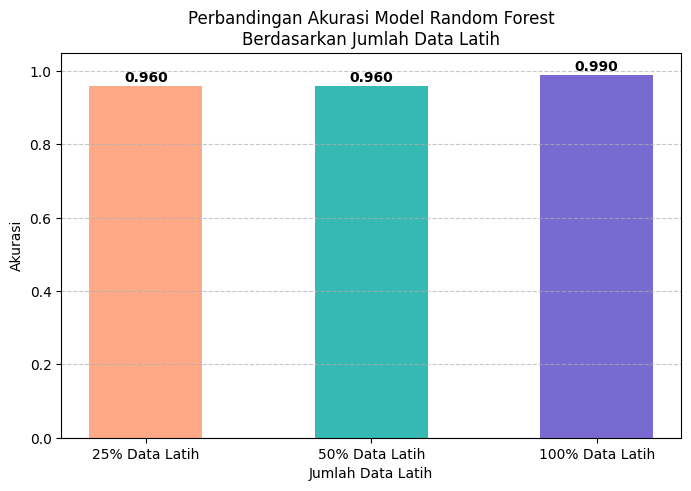

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 🎯 Misal hasil akurasi model dari tiga skenario jumlah data latih
# Gantilah nilai di bawah dengan hasil sebenarnya dari pengujianmu
accuracy_25 = 0.96
accuracy_50 = 0.96
accuracy_100 = 0.99

# Data untuk visualisasi
train_sizes = ['25% Data Latih', '50% Data Latih', '100% Data Latih']
accuracy_scores = [accuracy_25, accuracy_50, accuracy_100]

# ==============================
# 📊 Visualisasi Perbandingan Akurasi Berdasarkan Jumlah Data Latih
# ==============================
plt.figure(figsize=(8,5))
bars = plt.bar(train_sizes, accuracy_scores,
               color=['#FFA07A', '#20B2AA', '#6A5ACD'], alpha=0.9, width=0.5)

plt.ylim(0, 1.05)
plt.title('Perbandingan Akurasi Model Random Forest\nBerdasarkan Jumlah Data Latih')
plt.xlabel('Jumlah Data Latih')
plt.ylabel('Akurasi')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan nilai akurasi di atas batang
for bar, acc in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width()/2, acc + 0.01,
             f"{acc:.3f}", ha='center', fontsize=10, fontweight='bold')

plt.show()
